FINAL PROJECT - SANBERCODE
-------------------------------------------------------------------------------

About the Organization:

HELP International is an international humanitarian NGO committed to fighting poverty and providing basic facilities and assistance to people in underdeveloped countries during disasters and natural calamities.

Issues :

HELP International has managed to raise about $10 million. Now, the CEO of the NGO needs to decide how to use this money strategically and effectively. So, the CEO has to make a decision to choose the country that needs the most help.

COLUMNS
------
1. Negara : Name of the Country
2. Kematian_anak: Child mortality under age 5 per 1000 births
3. Ekspor : Export of goods and services per capita
4. Kesehatan: Total per capita expenditure
5. Impor: Import of goods and services per capita
6. Pendapatan: Net income per individual
7. Inflasi: Measures the annual growth rate of Total GDP
8. Harapan_hidup: The average number of years a newborn child would live if                   current mortality patterns remained the same
9. Jumlah_fertiliti: The number of children that would be born to each woman                      if the current age fertility rate remained the same
10. GDPperkapita: GDP per capita Calculated as Total GDP divided by total                     population. 


Data Prep
---

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [272]:
df = pd.read_csv('Data_Negara_HELP.csv')

df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [273]:
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [274]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Find the Missing Values & Drop Duplicates Data

In [275]:
df.drop_duplicates(inplace=True)

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

# Correlation Between Variables

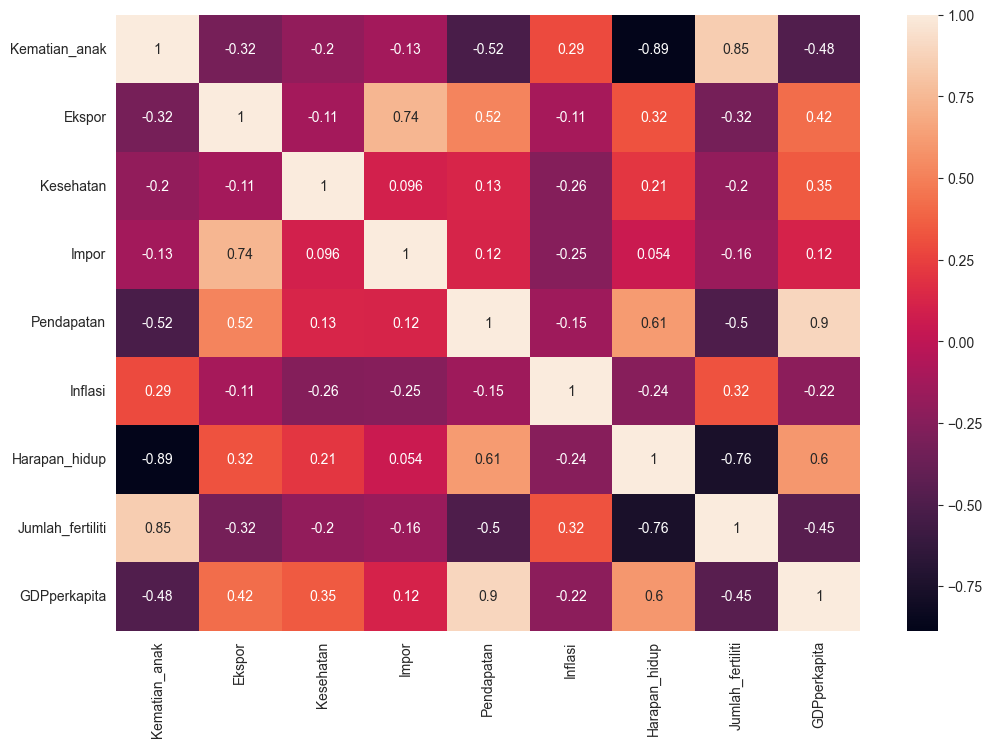

In [276]:
df_data = df.drop(['Negara'], axis=1)

plt.figure(figsize=(12,8))
sns_heatmap = sns.heatmap(df_data.corr(), annot=True, fmt='.2g');

fig = sns_heatmap.get_figure()
fig.savefig('heat_map1.png')
plt.show()


There are several positive and negative correlations with scores that tend to be larger than each other,such as : 

1. GDP Perkapita - Pendapatan
2. Harapan_Hidup - Kematian_anak

# Finding the Outliers

In [277]:
df_outlier = df.loc[:,['Pendapatan', 'GDPperkapita', 'Harapan_hidup', 'Kematian_anak']]

print(df_outlier.head())
print('\n', df_outlier.tail())

   Pendapatan  GDPperkapita  Harapan_hidup  Kematian_anak
0        1610           553           56.2           90.2
1        9930          4090           76.3           16.6
2       12900          4460           76.5           27.3
3        5900          3530           60.1          119.0
4       19100         12200           76.8           10.3

      Pendapatan  GDPperkapita  Harapan_hidup  Kematian_anak
162        2950          2970           63.0           29.2
163       16500         13500           75.4           17.1
164        4490          1310           73.1           23.3
165        4480          1310           67.5           56.3
166        3280          1460           52.0           83.1


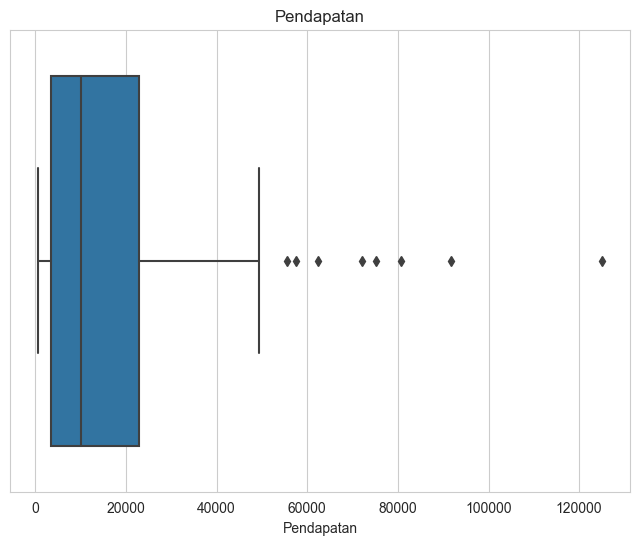

In [278]:
plt.figure(figsize=(8, 6))
boxplot_pendapatan = sns.boxplot(x='Pendapatan', data = df);

fig1 = boxplot_pendapatan.get_figure()
fig1.savefig('boxplot_pendapatan.png')
plt.title('Pendapatan')
plt.show()

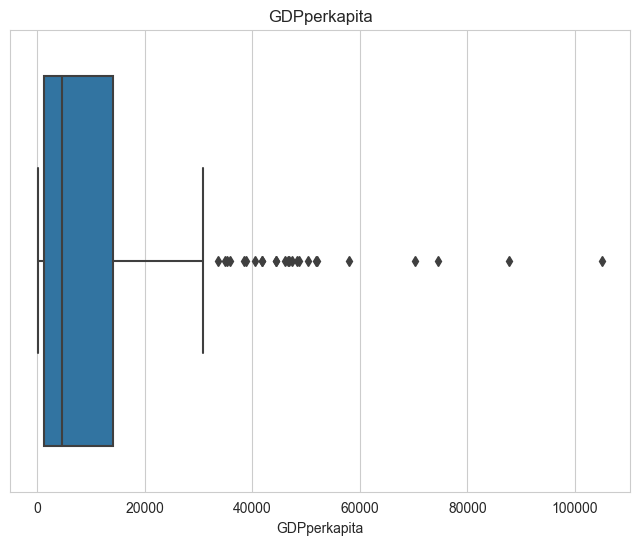

In [279]:
plt.figure(figsize=(8, 6))
boxplot_gdp = sns.boxplot(x='GDPperkapita', data = df);

fig1 = boxplot_gdp.get_figure()
fig1.savefig('boxplot_gdp.png')

plt.title('GDPperkapita')
plt.show()

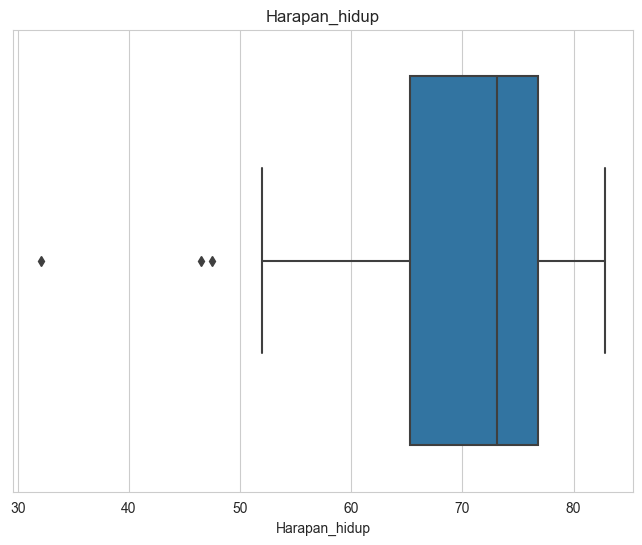

In [280]:
plt.figure(figsize=(8, 6))
boxplot_gdp = sns.boxplot(x='Harapan_hidup', data = df);

fig1 = boxplot_gdp.get_figure()
fig1.savefig('boxplot_gdp.png')

plt.title('Harapan_hidup')
plt.show()

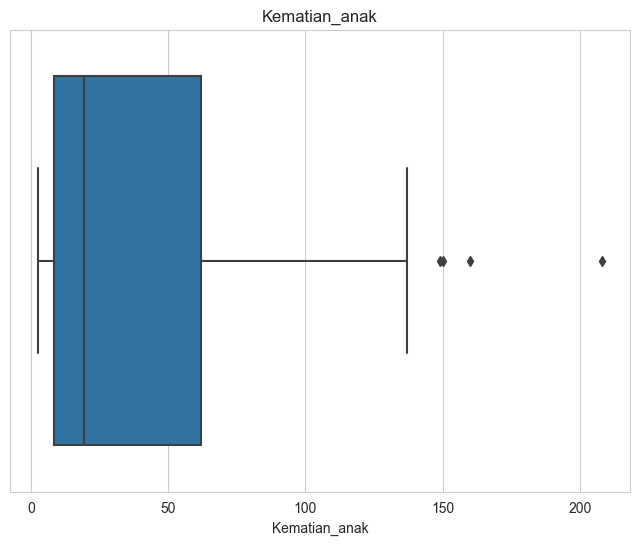

In [281]:
plt.figure(figsize=(8, 6))
boxplot_gdp = sns.boxplot(x='Kematian_anak', data = df);

fig1 = boxplot_gdp.get_figure()
fig1.savefig('boxplot_gdp.png')

plt.title('Kematian_anak')
plt.show()

The Outliers
---
There are several columns which contain have a several outliers, such as:
1. Pendapatan
2. GDPPerkapita
3. Kematian_anak
4. Harapan_hidup

there are outliers in the 'Harapan_hidup' and 'Kematian_anak' columns with information below the quantile value of 25 and above the quantile value of 75, then we will keep the data because the short 'Harapan_hidup' and 'Kematian_anak' already indicate a weak country.

# Dealing with the Outliers


In [282]:
#Find the lower and outer in columns data
def lowerandbound(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1 - (1.5 * iqr)
    upper_bound=q3 + (1.5 * iqr)
    print(lower_bound, upper_bound)

pendapatan = lowerandbound(df[['Pendapatan', 'GDPperkapita', 'Kematian_anak']])

Pendapatan      -25812.500
GDPperkapita    -17750.000
Kematian_anak      -72.525
dtype: float64 Pendapatan       51967.500
GDPperkapita     33130.000
Kematian_anak      142.875
dtype: float64


GDPperkapita
---

In [283]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit
df.loc[(df['GDPperkapita'] > upper_limit) | (df['GDPperkapita'] < lower_limit)]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


In [284]:
new_df = df.loc[(df['GDPperkapita'] < upper_limit) & (df['Kematian_anak'] > lower_limit)]

print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(new_df) - len(df))

old data: 167
new data: 129
outliers: -38


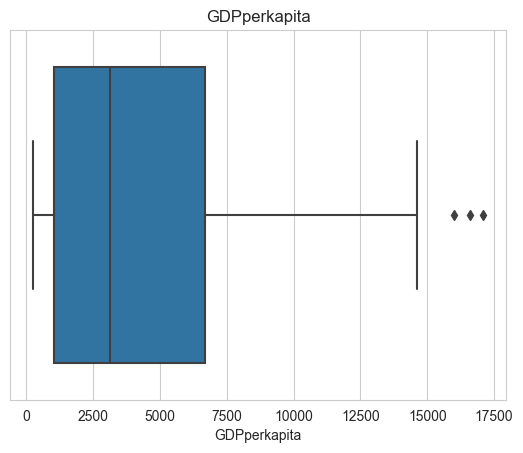

In [285]:
sns.boxplot(x='GDPperkapita', data = new_df)
plt.title('GDPperkapita');

Because our focus is to find the weakest country, we make the outer bound into one group or tripping the data

In [286]:
#Tripping the Data 
new_df = df.copy()
new_df.loc[(new_df['GDPperkapita'] > upper_limit), 'GDPperkapita'] = upper_limit
new_df.loc[(new_df['GDPperkapita'] < lower_limit), 'GDPperkapita'] = lower_limit
print('data baru:', len(new_df))
print('data lama:', len(df))

data baru: 167
data lama: 167


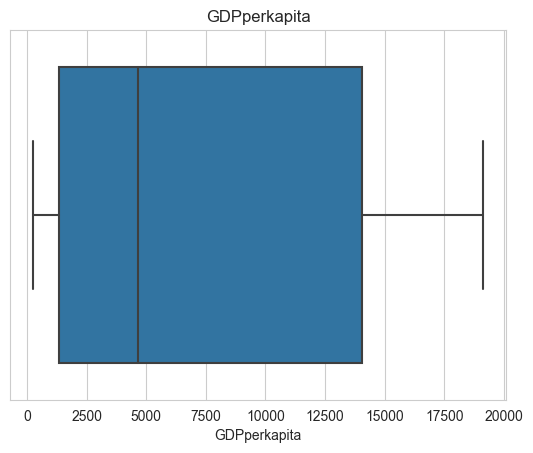

In [287]:
sns.boxplot(x='GDPperkapita', data = new_df)
plt.title('GDPperkapita');

Pendapatan
---

In [288]:
quan_1 = new_df['Pendapatan'].quantile(0.25)
quan_3 = new_df['Pendapatan'].quantile(0.75)
iqrt = quan_3 - quan_1

print(quan_1, iqrt, quan_3)

3355.0 19445.0 22800.0


In [289]:
upper = quan_3 + (1.5 * iqrt)
lower = quan_1 - (1.5 * iqrt)
new_df.loc[(new_df['Pendapatan'] > upper) | (new_df['Pendapatan'] < lower)]
print(upper, lower)

51967.5 -25812.5


In [290]:
data_baru = new_df[(new_df['Pendapatan'] < upper) & (new_df['Pendapatan'] > lower)]

data_baru.sort_values(by = 'Pendapatan', ascending = True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334.0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327.0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231.0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446.0
...,...,...,...,...,...,...,...,...,...,...
115,Oman,11.7,65.70,2.77,41.2,45300,15.600,76.1,2.90,19142.1
128,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19142.1
110,Netherlands,4.5,72.00,11.90,63.6,45500,0.848,80.7,1.79,19142.1
73,Ireland,4.2,103.00,9.19,86.5,45700,-3.220,80.4,2.05,19142.1


Text(0.5, 1.0, 'Pendapatan')

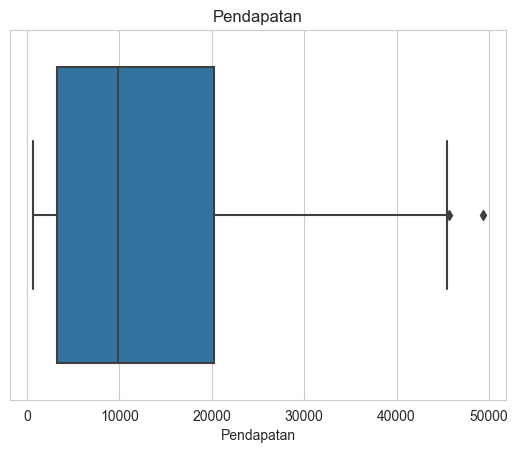

In [291]:
sns.boxplot(x='Pendapatan', data = data_baru)
plt.title('Pendapatan')

Because our focus is to find the weakest country, we make the outer bound into one group or tripping the data

In [292]:
data_baru.sort_values(by = 'Pendapatan', ascending = True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334.0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327.0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231.0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446.0
...,...,...,...,...,...,...,...,...,...,...
115,Oman,11.7,65.70,2.77,41.2,45300,15.600,76.1,2.90,19142.1
128,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19142.1
110,Netherlands,4.5,72.00,11.90,63.6,45500,0.848,80.7,1.79,19142.1
73,Ireland,4.2,103.00,9.19,86.5,45700,-3.220,80.4,2.05,19142.1


In [293]:
data_baru = new_df.copy()
data_baru.loc[(data_baru['Pendapatan'] > upper), 'Pendapatan'] = upper
data_baru.loc[(data_baru['Pendapatan'] < lower), 'Pendapatan'] = lower
print('data baru:', len(data_baru))
print('data lama:', len(new_df))

data baru: 167
data lama: 167


Text(0.5, 1.0, 'Pendapatan')

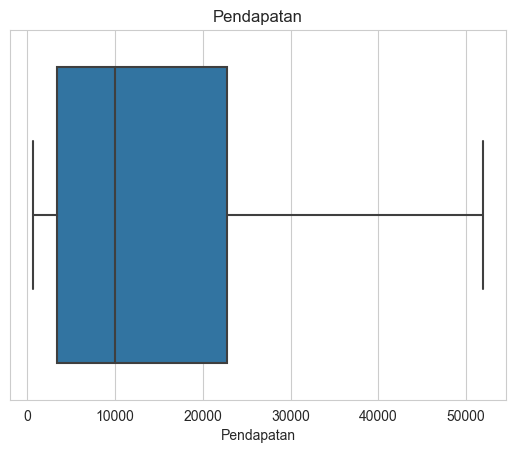

In [294]:
sns.boxplot(x='Pendapatan', data = data_baru)
plt.title('Pendapatan')

In [295]:
data_baru.sort_values(by = 'Pendapatan', ascending = True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0
...,...,...,...,...,...,...,...,...,...,...
123,Qatar,9.0,62.30,1.81,23.8,51967.5,6.980,79.5,2.07,19142.1
145,Switzerland,4.5,64.00,11.50,53.3,51967.5,0.317,82.2,1.52,19142.1
23,Brunei,10.5,67.40,2.84,28.0,51967.5,16.700,77.1,1.84,19142.1
157,United Arab Emirates,8.6,77.70,3.66,63.6,51967.5,12.500,76.5,1.87,19142.1


Looking the data after handling outliers
---

In [296]:
data_new.sort_values(by = 'GDPperkapita', ascending = True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220.0,17.200,55.0,5.20,399.0
...,...,...,...,...,...,...,...,...,...,...
135,Slovenia,3.2,64.30,9.41,62.9,28700.0,-0.987,79.5,1.57,19142.1
23,Brunei,10.5,67.40,2.84,28.0,51967.5,16.700,77.1,1.84,19142.1
138,South Korea,4.1,49.40,6.93,46.2,30400.0,3.160,80.1,1.23,19142.1
42,Cyprus,3.6,50.20,5.97,57.5,33900.0,2.010,79.9,1.42,19142.1


In [297]:
data_new.sort_values(by = 'Pendapatan', ascending = True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0
...,...,...,...,...,...,...,...,...,...,...
123,Qatar,9.0,62.30,1.81,23.8,51967.5,6.980,79.5,2.07,19142.1
145,Switzerland,4.5,64.00,11.50,53.3,51967.5,0.317,82.2,1.52,19142.1
23,Brunei,10.5,67.40,2.84,28.0,51967.5,16.700,77.1,1.84,19142.1
157,United Arab Emirates,8.6,77.70,3.66,63.6,51967.5,12.500,76.5,1.87,19142.1


In [298]:
data_new.sort_values(by = 'Kematian_anak', ascending = True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
68,Iceland,2.6,53.4,9.40,43.3,38800.0,5.470,82.0,2.20,19142.1
91,Luxembourg,2.8,175.0,7.77,142.0,51967.5,3.620,81.3,1.63,19142.1
133,Singapore,2.8,200.0,3.96,174.0,51967.5,-0.046,82.7,1.15,19142.1
53,Finland,3.0,38.7,8.95,37.4,39800.0,0.351,80.0,1.87,19142.1
144,Sweden,3.0,46.2,9.63,40.7,42900.0,0.991,81.5,1.98,19142.1
...,...,...,...,...,...,...,...,...,...,...
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.370,59.5,6.55,708.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.010,47.5,5.21,446.0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.390,56.5,6.59,897.0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.200,55.0,5.20,399.0


Filtering 
---
Because there is a very large difference in data distribution, filtering will be carried out so that visualization does not occur imbalance.

In [299]:
#new_data = data_new[(data_new['GDPperkapita']<=5000)]
#new_data.sort_values(by='GDPperkapita', ascending = True)

GDP = data_new['GDPperkapita']<=5000

In [300]:
#new_data = data_new[(data_new['Kematian_anak'] >= 90)]
#new_data.sort_values(by='Kematian_anak', ascending =True)

Kematian = data_new['Kematian_anak'] >= 90

In [301]:
#new_data = data_new[(data_new['Pendapatan']<=10000)]
#new_data.sort_values(by='Pendapatan', ascending =True)

Pendapatan = data_new['Pendapatan']<=10000

In [302]:
#new_data = data_new[(data_new['Harapan_hidup']<=100)]
#new_data.sort_values(by='Harapan_hidup', ascending =True)

Harapan = data_new['Harapan_hidup']<=80

In [303]:
data1 = data_new[(GDP | Pendapatan) & (Kematian | Harapan)]

data1.sort_values(by = 'Harapan_hidup', ascending = False)


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
119,Peru,20.3,27.8,5.08,23.8,9960.0,5.71,77.9,2.54,5020.0
152,Tunisia,17.4,50.5,6.21,55.3,10400.0,3.82,76.9,2.14,4140.0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720.0,1.40,76.8,1.31,4610.0
46,Ecuador,25.1,27.9,8.06,32.4,9350.0,7.47,76.7,2.66,4660.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
...,...,...,...,...,...,...,...,...,...,...
94,Malawi,90.5,22.8,6.59,34.9,1030.0,12.10,53.1,5.31,459.0
166,Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1460.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0
87,Lesotho,99.7,39.4,11.10,101.0,2380.0,4.15,46.5,3.30,1170.0


# Univariate Analysis
Analysis used to analyze in each one variable

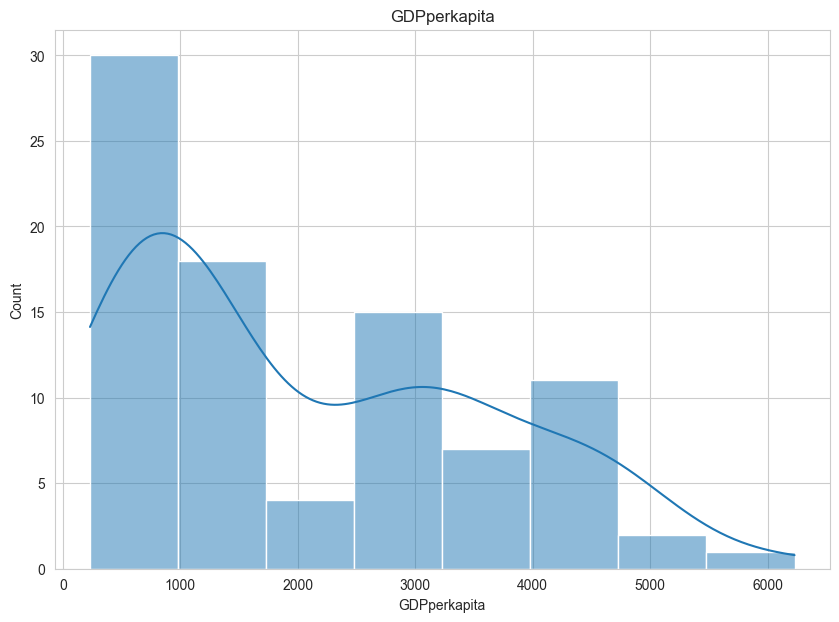

In [304]:
#Univariate_analysis
plt.figure(figsize=(10, 7))
sns.histplot(data1['GDPperkapita'], kde = True)
sns.set_style('whitegrid')
plt.xlabel('GDPperkapita')
plt.ylabel('Count')
plt.title('GDPperkapita')


#plt.savefig('variate_pendapatan.png')
plt.show()

In [305]:
kapita = data1.sort_values(by='GDPperkapita', ascending = True).reset_index()

kapita.loc[:31, ['Negara', 'GDPperkapita']]

,Negara,GDPperkapita
0,Burundi,231.0
1,Liberia,327.0
2,"Congo, Dem. Rep.",334.0
3,Niger,348.0
4,Sierra Leone,399.0
5,Madagascar,413.0
6,Mozambique,419.0
7,Central African Republic,446.0
8,Malawi,459.0
9,Eritrea,482.0


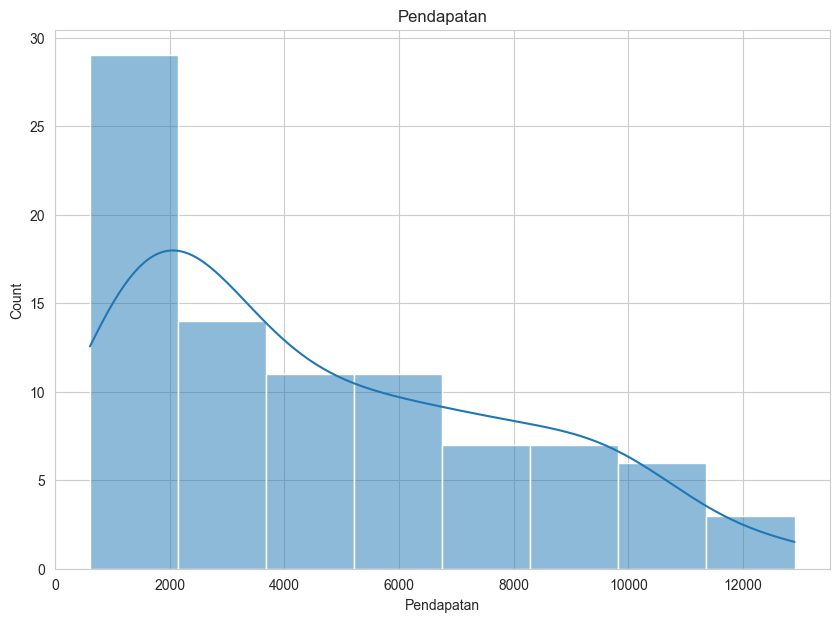

In [306]:
plt.figure(figsize=(10, 7))
sns.histplot(data1['Pendapatan'], kde = True)
sns.set_style('whitegrid')
plt.xlabel('Pendapatan')
plt.ylabel('Count')
plt.title('Pendapatan')
plt.yticks(np.arange(0, plt.ylim()[1] + 1, 5))



#plt.savefig('variate_pendapatan.png')
plt.show()

In [307]:
pdpt = data1.sort_values(by='Pendapatan', ascending = True).reset_index()

pdpt.loc[:27, ['Negara', 'GDPperkapita']]

,Negara,GDPperkapita
0,"Congo, Dem. Rep.",334.0
1,Liberia,327.0
2,Burundi,231.0
3,Niger,348.0
4,Central African Republic,446.0
5,Mozambique,419.0
6,Malawi,459.0
7,Guinea,648.0
8,Togo,488.0
9,Sierra Leone,399.0


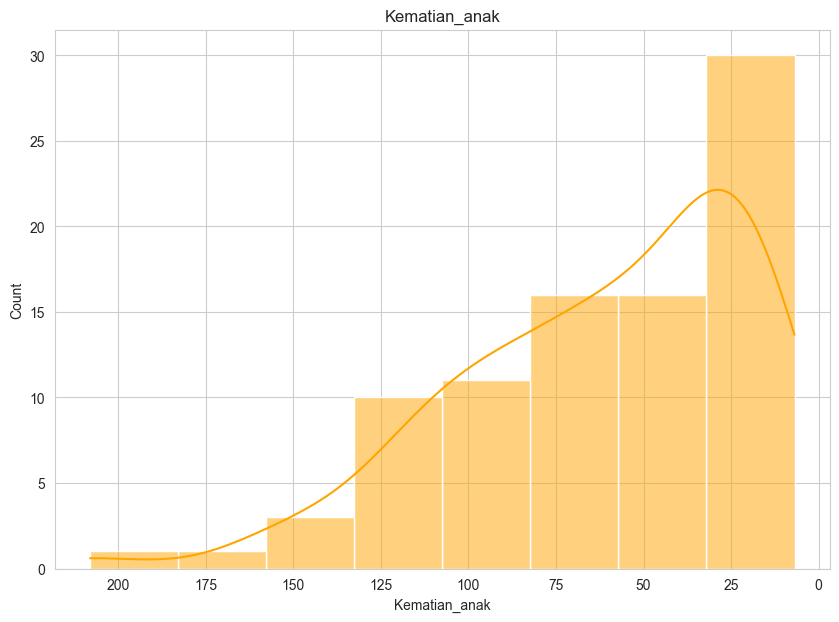

In [308]:
plt.figure(figsize=(10, 7))
sns.histplot(data1['Kematian_anak'], kde = True, color = 'orange')
sns.set_style('whitegrid')
plt.xlabel('Kematian_anak')
plt.ylabel('Count')
plt.title('Kematian_anak')
plt.xlim(reversed(plt.xlim()))
plt.yticks(np.arange(0, plt.ylim()[1] + 1, 5))  # Adjust the step size as needed


#plt.savefig('variate_pendapatan.png')
plt.show()

In [309]:
kmtn = data1.sort_values(by='Kematian_anak', ascending = False).reset_index()

kmtn.loc[:16, ['Negara', 'Kematian_anak']]

,Negara,Kematian_anak
0,Haiti,208.0
1,Sierra Leone,160.0
2,Chad,150.0
3,Central African Republic,149.0
4,Mali,137.0
5,Nigeria,130.0
6,Niger,123.0
7,Angola,119.0
8,Burkina Faso,116.0
9,"Congo, Dem. Rep.",116.0


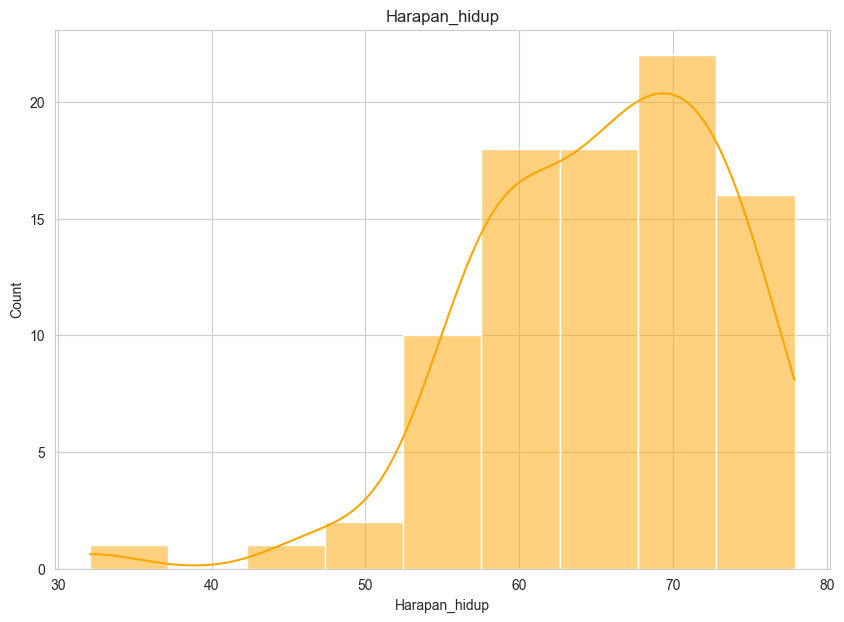

In [310]:
plt.figure(figsize=(10, 7))
sns.histplot(data1['Harapan_hidup'], kde = True, color = 'orange')
sns.set_style('whitegrid')
plt.xlabel('Harapan_hidup')
plt.ylabel('Count')
plt.title('Harapan_hidup')


#plt.savefig('variate_pendapatan.png')
plt.show()

In [311]:
hrpn = data1.sort_values(by='Harapan_hidup', ascending = True).reset_index()

hrpn.loc[:22, ['Negara', 'Harapan_hidup']]

,Negara,Harapan_hidup
0,Haiti,32.1
1,Lesotho,46.5
2,Central African Republic,47.5
3,Zambia,52.0
4,Malawi,53.1
5,Mozambique,54.5
6,Sierra Leone,55.0
7,Guinea-Bissau,55.6
8,Afghanistan,56.2
9,Cote d'Ivoire,56.3


Analysis Description
---
Some of the graphs above show the analysis of each variable categorized by the number of countries. The graphs consist of GDPperkapita, Pendapatan, Kematian_anak, and Harapan_hidup.

1. GDPperkapita = There are 31 countries that have a very small GDP per capita with a range between 231 - 988.
2. Pendapatan = There are 27 countries that have a very small income with a range of 609 - 2300.
3. Kematian_anak = There are 15 countries that have a number of deaths between 120 - 140
4. Harapan_hidup = There are 23 countries that have a life expectancy between 30 - 60.

There is one country of particular concern in this analysis, which is Central African Republic, as it ranks in the top 10 in each of the weak categories mentioned.

# Bivariate_Analysis

Analysis used to analyze a correlation in two variables

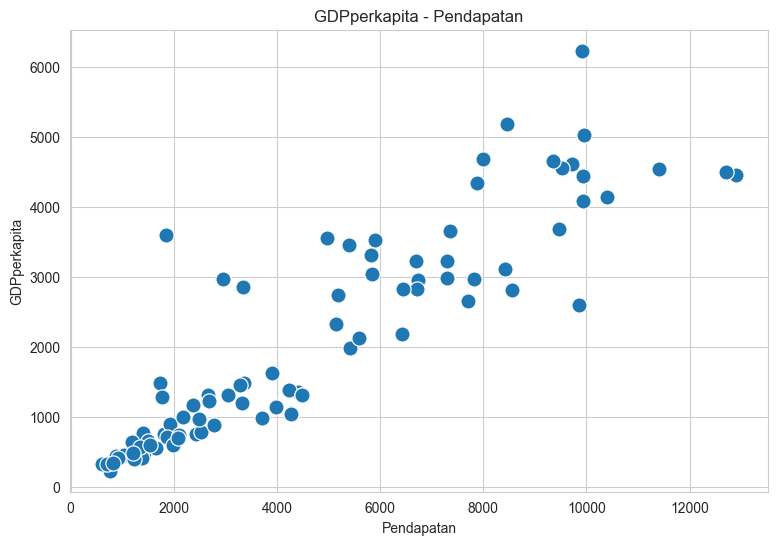

In [312]:
#Bivariate_analysis
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x = 'Pendapatan', y = 'GDPperkapita', data = data1, s=120)
sns.set_style('whitegrid')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.title('GDPperkapita - Pendapatan')
plt.savefig('Bivariate(GDPperkapita - Pendapatan).png')
plt.show()

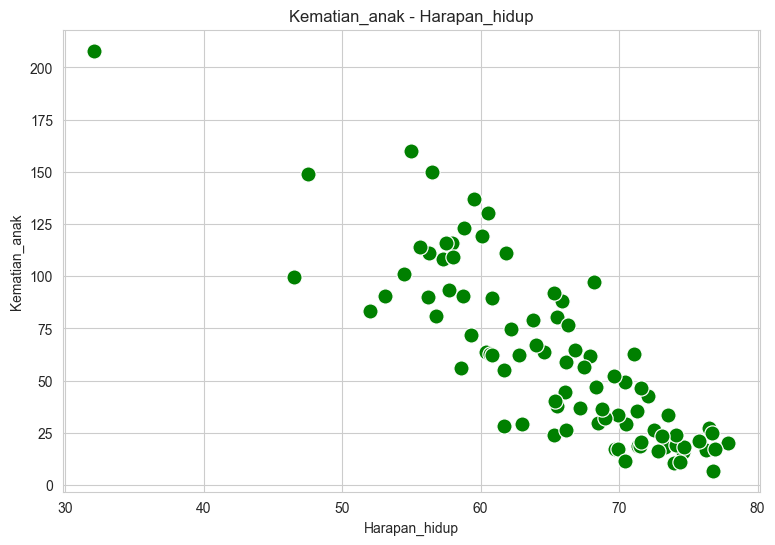

In [313]:
#Bivariate_analysis
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x = 'Harapan_hidup', y = 'Kematian_anak', data = data1, s=120, color = 'green')
sns.set_style('whitegrid')
plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')
plt.title('Kematian_anak - Harapan_hidup')
plt.savefig('Bivariate (Kematian_anak - Harapan_hidup.png')
plt.show()

Analysis Description
----
The graph above shows the correlation between two interrelated variables, GDPperkapita - Pendapatan, and Kematian_anak - Harapan_hidup.

1. GDPperkapita - Pendapatan= The graph shows several points from the bottom rising upwards, which means that there is a positive correlation when the x variable is getting bigger, the y variable is also getting bigger. It can be seen that there are several countries that have high 'Pendapatan' and high 'GDPperkapita'.

2. Kematian_anak - Harapan_hidup = This graph shows several points from the top going down, it means that there is a negative correlation when the x variable is getting bigger, it will be opposite to the y variable, and vice versa.It can be seen that there are several countries that have low 'Kematian_anak' and high 'Harapan_hidup.

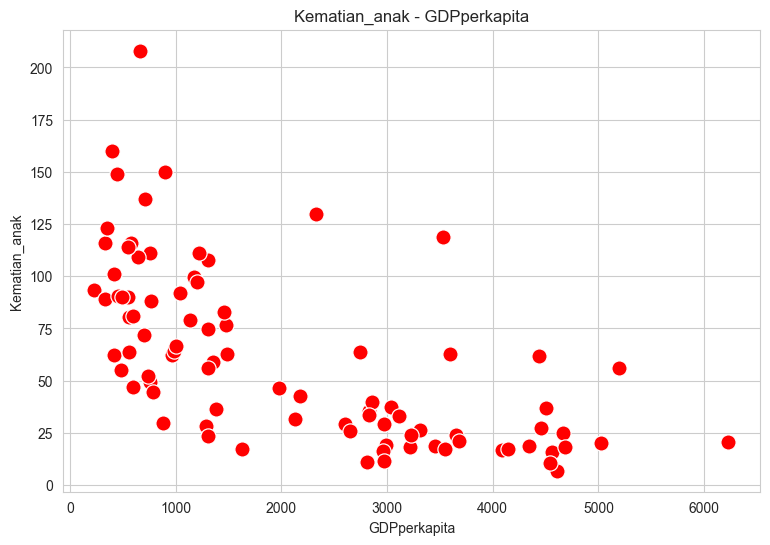

In [314]:
#Bivariate_analysis
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x = 'GDPperkapita', y = 'Kematian_anak', data = data1, s=120, color = 'red')
sns.set_style('whitegrid')
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.title('Kematian_anak - GDPperkapita')
plt.savefig('Crossing Bivariate (Kematian_anak - GDPperkapita).png')
plt.show()

Crossing Variable
---
GDPperkapita - Harapan_hidup 

1. GDPperkapita = An indicator of a country's prosperity and level of development. The greater the per capita income, the more likely it is that the country has a high level of development and average income of the population. 
2. Kematian_anak = The child mortality rate reflects environmental health conditions that directly affect the level of child health. A high child mortality rate indicates a state of malnutrition, poor personal hygiene and hygiene.

Graph
---

The graph shows that there are several countries that have high child mortality rates and low GDP per capita. This shows that prosperity and development levels are still relatively low, which is one of the factors that cause a poor hygiene and health environment, resulting in high child mortality rates.

# Machine Learning 

Unsupervised Model Training with Clustering
---

In [315]:
features = ['GDPperkapita', 'Pendapatan', 'Harapan_hidup', 'Kematian_anak']

D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

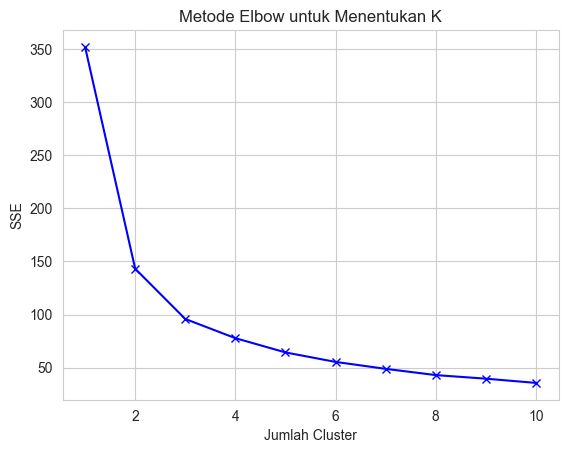

In [316]:
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(data1[features])

#Elbow Method
kmeans1 = KMeans(n_clusters=3, random_state=30).fit(dfoutlier_std) 
labels1 = kmeans1.labels_

sse = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(dfoutlier_std)
    sse.append(kmeans.inertia_)

plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()

In [317]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(dfoutlier_std)

D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [318]:
data1['cluster'] = labels
data1.shape

C:\Users\Smith\AppData\Local\Temp\ipykernel_28968\1243860481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cluster'] = labels


(88, 11)

In [319]:
data1 = data1.astype({'cluster':'int64'})

data1['cluster'].replace([0,1,2], [1,2,0], inplace = True)
data1.groupby('cluster')[features].mean()

,GDPperkapita,Pendapatan,Harapan_hidup,Kematian_anak
cluster,,,,
0,850.583333,1853.8750,55.445833,115.820833
1,1325.312500,3029.3750,65.884375,56.696875
2,3766.250000,8404.0625,72.006250,24.959375


Analysis
---

There are several clusters that classify countries based on GDP per capita, income, life expectancy, and child mortality. 

0. Cluster 0 = From the average, it indicates a low value owned by some countries, it shows that some of these countries are underdeveloped countries in terms of underdevelopment of economic conditions, and health.

1. Cluster 1 = From the average, it indicates a medium value owned by some countries, it shows that some of these countries include developing countries in terms of economic conditions, and health

2. Cluster 2 = From the average, it indicates a medium value owned by several countries, it shows that this country is a developed country in terms of economic conditions, and health.

In [320]:
def clustering(data1, col1, col2):
    # Define the unique cluster labels
    data1.sort_values (by = 'cluster', inplace = True)
    unique_clusters = data1['cluster'].unique()
    
    # Define colors for each cluster
    colors = ['red', 'blue', 'green']  # Add more colors as needed
    # Create a scatter plot for each cluster
    plt.figure(figsize=(8, 6))
    for i, cluster_label in enumerate(unique_clusters):
        cluster_df = data1[data1['cluster'] == cluster_label]
        plt.scatter(cluster_df[col1], cluster_df[col2], color=colors[i], label=f'Cluster {cluster_label}', s = 120)
    
    data1.sort_values(by = 'cluster', ascending = True)
    # Add labels and legend
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title('{} - {}'.format(str(col1), str(col2)))
    plt.savefig('{}, & {}.png'.format(str(col1),str(col2)))
    # Show the plot after all clusters have been plotted
    plt.show()


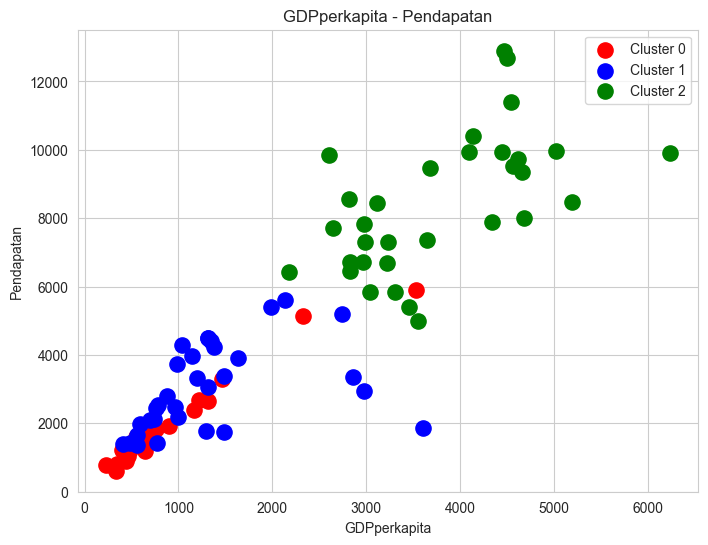

In [321]:
clustering(data1, 'GDPperkapita', 'Pendapatan')

In [322]:
select_cols = ['Negara','GDPperkapita', 'Pendapatan', 'cluster']
clustergroup = data1[select_cols].sort_values(by='GDPperkapita',ascending = True)
clustergroup[clustergroup['cluster']==0].reset_index().head(15)

,index,Negara,GDPperkapita,Pendapatan,cluster
0,26,Burundi,231.0,764.0,0
1,88,Liberia,327.0,700.0,0
2,37,"Congo, Dem. Rep.",334.0,609.0,0
3,112,Niger,348.0,814.0,0
4,132,Sierra Leone,399.0,1220.0,0
5,106,Mozambique,419.0,918.0,0
6,31,Central African Republic,446.0,888.0,0
7,94,Malawi,459.0,1030.0,0
8,150,Togo,488.0,1210.0,0
9,64,Guinea-Bissau,547.0,1390.0,0


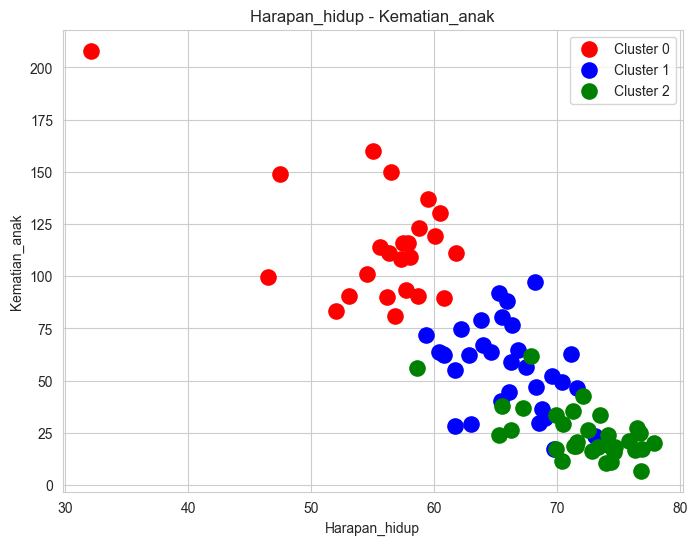

In [323]:
clustering(data1, 'Harapan_hidup', 'Kematian_anak')

In [324]:
select_cols = ['Negara','Harapan_hidup', 'Kematian_anak', 'cluster']
clustergroup = data1[select_cols].sort_values(by= 'Kematian_anak',ascending = False)
clustergroup[clustergroup['cluster']==0].reset_index().head(15)

,index,Negara,Harapan_hidup,Kematian_anak,cluster
0,66,Haiti,32.1,208.0,0
1,132,Sierra Leone,55.0,160.0,0
2,32,Chad,56.5,150.0,0
3,31,Central African Republic,47.5,149.0,0
4,97,Mali,59.5,137.0,0
5,113,Nigeria,60.5,130.0,0
6,112,Niger,58.8,123.0,0
7,3,Angola,60.1,119.0,0
8,25,Burkina Faso,57.9,116.0,0
9,37,"Congo, Dem. Rep.",57.5,116.0,0


Analysis Clustering
---


There are 6 countries that are among the top 15 in cluster 0 based on bivariate and crossing variables 
1. Congo
2. Central African Republic
3. Niger
4. Sierra Leoni
5. Haiti
6. Guinie-Bissau

Analysis based on average economic conditions and life expectancy
---

In [267]:
Negara = ['Congo, Dem. Rep.', 'Central African Republic', 'Niger', 'Sierra Leone', 'Haiti', 'Guinea-Bissau']

new_df = data1[data1['Negara'].isin(Negara)].loc[:, ['Negara','Kematian_anak', 'Harapan_hidup', 'Pendapatan', 'GDPperkapita']]

new_df.reset_index()

,index,Negara,Kematian_anak,Harapan_hidup,Pendapatan,GDPperkapita
0,66,Haiti,208.0,32.1,1500.0,662
1,112,Niger,123.0,58.8,814.0,348
2,64,Guinea-Bissau,114.0,55.6,1390.0,547
3,37,"Congo, Dem. Rep.",116.0,57.5,609.0,334
4,31,Central African Republic,149.0,47.5,888.0,446
5,132,Sierra Leone,160.0,55.0,1220.0,399


In [325]:
select_cols = ['Negara','Kematian_anak', 'Harapan_hidup''GDPperkapita', 'Pendapatan', 'cluster']
clustergroup = data1[(data1['cluster'] == 0) & (data1['Negara'].isin(Negara))].loc[:, ['Negara','Kematian_anak', 'Harapan_hidup','GDPperkapita', 'Pendapatan', 'cluster']]

new_df = clustergroup.reset_index().drop(columns = 'index')
new_df.index += 1

In [326]:
final_data = new_df.reindex(index=[2, 6, 3, 1, 4 ,5])
final_data = final_data.reset_index().drop(columns = 'index')
final_data.index += 1

final_data.drop(columns='cluster', inplace = True)

In [327]:
import dataframe_image as dfi

df_styled = final_data.style.background_gradient(axis = None, 
                                                  subset=subset, low = 0.1, high = 0.6,
                                                  gmap = final_data.rank(ascending = True).rsub(0)).background_gradient(axis = None, 
                                                                                                                        subset='Kematian_anak', low = 0.2, high = 0.6 ,
                                                                                                                        gmap = final_data.rank(ascending = False).rsub(0))
df_styled
dfi.export(df_styled, 'Final_data.png')

Conclusion
---


Based on the heat map that has been presented, there is a ranking of countries of concern for
areas that need assistance, as follows:
1. Central African Repbulic
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone
5. Haiti
6. Guinea-Bissau